Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [3]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

In [3]:
Name = "Yujing Zhang"
Collaborator = "Consult with TA"
Uni = "yz4471"

# HW 6:  ODE Methods - Initial Value Problems

For all of these questions write your own functions for the ODE solvers and Newton's method (you can copy from your previous homework of course).

## Question 1 - Techniques for Systems of ODEs

Consider the system of ODEs

$$\begin{aligned}
v'''(t) &= t^2 v v'' - v w' \\
w''(t) &= t w w' + 4 v'
\end{aligned}$$
with 
$$
    v(0) = 1, v'(0) = \frac{1}{4}, v''(0) = \frac{1}{3}, w(0) = \frac{1}{2}, \quad \text{and} \quad w'(0) = 0.
$$

**(a)** (10) Write the system of differential equations as a first-order system of differential equations, $u' = f(x, u)$.

Let 
$$
    \vec{\!u} = \begin{bmatrix} v \\ v' \\ v'' \\ w \\ w' \end{bmatrix} = \begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ u_4 \\ u_5 \end{bmatrix}
$$

So,
$$\frac{d}{dt} \begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ u_4 \\ u_5 \end{bmatrix} = \begin{bmatrix} u_2 \\ u_3 \\ t^2u_1u_3 \\ u_5 \\ tu_4u_5 + 4u_2 \end{bmatrix}$$

**(b)** (10) Write code that solves the system using a method we discussed in class that is higher than 2nd order.  Do not use `scipy.integrate`.  Make sure to choose a method that will work for the non-linear right-hand-side.  Integrate the system to time $t_f = 1$ and plot the phase plane solution $(v, w)$.

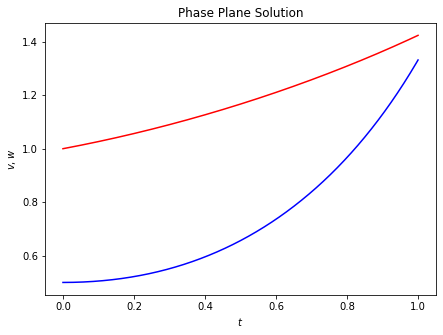

In [4]:
# YOUR CODE HERE
#raise NotImplementedError()
def solve_RK4(t):
    u_0 = numpy.array([1, 0.25, 1/3, 0.5, 0.0])
    
    N = len(t)
    delta_t = t[1] - t[0]
    u_4 = numpy.empty((5, N))
    u_4[:, 0] = u_0
    
    
    def f(t, u_4):
        return numpy.array([u_4[1], u_4[2], t**2 * u_4[0] * u_4[2], u_4[4], t * u_4[3] * u_4[4] + 4*u_4[1]])
    
    for (n, t_n) in enumerate(t[1:]):
        y_1 = u_4[:, n]
        y_2 = u_4[:, n] + 0.5 * delta_t * f(t_n, y_1)
        y_3 = u_4[:, n] + 0.5 * delta_t * f(t_n + 0.5 * delta_t, y_2)
        y_4 = u_4[:, n] + delta_t * f(t_n + 0.5 * delta_t, y_3)
        u_4[:, n+1] = u_4[:, n] + delta_t / 6.0 * (f(t_n, y_1) + 2.0 * f(t_n + 0.5 * delta_t, y_2) + 2.0 * f(t_n + 0.5 * delta_t, y_3) + f(t_n + delta_t, y_4))
    
    v = u_4[0, :]
    w = u_4[3, :]
    
    return v, w

t = numpy.linspace(0, 1.0, 1000)
v, w = solve_RK4(t)

figure = plt.figure(figsize = (7, 5))
plt.xlabel("$t$")
plt.ylabel("$v, w$")
plt.title("Phase Plane Solution")
plt.plot(t, v, "r")
plt.plot(t, w, "b")

plt.show()

**(c)** (5) For systems of non-linear ODEs it is often useful to consider the linearization of the right-hand-side function $f$ and its properties as approximately linear in some region.  The Jacobian matrix $J(f)$ is often used in this context with
$$
    u' \approx J(f) u = A(t,u) u.
$$
This is useful if attempting to use an implicit method as we can evaluate the Jacobian matrix at the current time so that it is not dependent on $U_{n+1}$ and then solve a linear system of equations.

Compute the Jacobian matrix of $f(t, u)$ for the system from part (a).  Recall that the Jacobian matrix is defined as 
$$
    [J(f(t,u))]_{ij} = \frac{\partial}{\partial u_j}  f_i(t, u).
$$

According to the definition,

$$[J(f(t,u))]_{ij} =
\begin{bmatrix} 
    0 & 1 & 0 & 0 & 0\\
    0 & 0 & 1 & 0 & 0\\
    t^2u_3-u_5 & 0 & t^2u_1 & 0 & -u_1\\
    0 & 0 & 0 & 0 & 1\\
    0 & 4 & 0 & tu_5 & tu_4
\end{bmatrix}$$

**(d)** (10) Now using the approach outlined in part (c) use the ODE solver Adams-Moulton 3-step to solve the equations.  This time you may use `numpy.linalg.solve`.  Please plot the results as before.

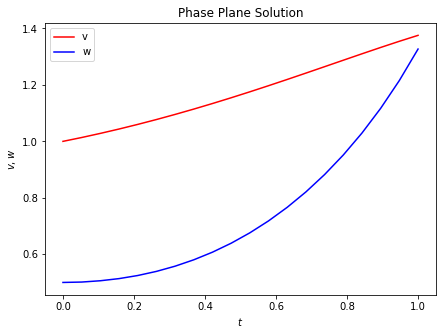

In [5]:
# YOUR CODE HERE
# raise NotImplementedError()
# Use 2-step Adams-Moulton to compute solution
# u' = - decay u


#50, 10
def f(t, u):
    return numpy.array([u[1], u[2], t**2 * u[0] * u[2], u[4], t * u[3] * u[4] + 4*u[1]])

def J(t, u):# j 
    J = numpy.array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, t**2 * u[2] - u[4], 0, t**2 * u[0], 0, -u[0], 0, 0, 0, 0, 1, 0, 4, 0, t*u[4], t*u[3]])
    J = J.reshape(5, 5)
    return J

u_0 = numpy.array([1, 0.25, 1/3, 0.5, 0.0])
N = 20
t = numpy.linspace(0, 1, N)
delta_t = t[1] - t[0]
U = numpy.empty((5, N))
U[:, 0] = u_0

U[:, 1]= U[:, 0] + 0.5 * delta_t * f(t[0], U[:, 0])            #set up
U[:, 1] = U[:, 0] + delta_t * f(t[0], U[:, 1])
U[:, 2] = U[:, 1] + delta_t / 12 * (-f(t[0], U[:, 0]) + 8 * f(t[1], U[:, 1]))
U[:, 2] = U[:, 1] + delta_t * f(t[1], U[:, 2])
for n in range(t.shape[0] - 3):
    b = U[:, n+2] + delta_t / 24.0 * (f(t[n], U[:, n]) - 5.0 * f(t[n+1], U[:, n+1]) + 19 * f(t[n+2], U[:, n+2]))
    LHS = numpy.identity(5) - numpy.dot(9 * delta_t / 24, J(t[n+2], U[:, n+2]))
    U[:, n+3] = numpy.linalg.solve(LHS, b)
    
v = U[0, :]
w = U[3, :]

figure = plt.figure(figsize = (7, 5))
plt.xlabel("$t$")
plt.ylabel("$v, w$")
plt.title("Phase Plane Solution")
plt.plot(t, v, "r")
plt.plot(t, w, "b")
plt.legend(["v", "w"])

plt.show()

**(e)** (5) Comment on what you observe from parts (b) and (d).  Try increasing the $t_f$ or changing the number of times steps you take (or shrink $\Delta t$).  Explain why you might see this behavior.

1. As the graphs **above** shows, the graphs in (b) and (d) are similar when we have the same $t_f$ and step $N$, which indicates that the Jacobian matrix is a valid linear approxiamation.

2. As the graphs **below** shows, as the increase of $t_f$ and $N$, $v$ and $w$ converge to the same point

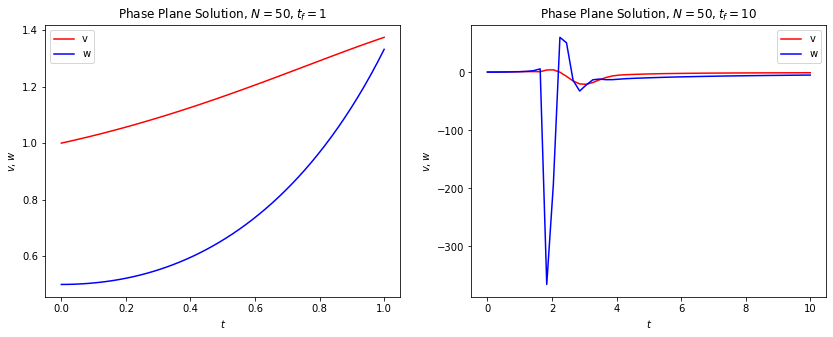

In [6]:
# N = 50, tf = 1
def f(t, u):
    return numpy.array([u[1], u[2], t**2 * u[0] * u[2], u[4], t * u[3] * u[4] + 4*u[1]])

def J(t, u):# j 
    J = numpy.array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, t**2 * u[2] - u[4], 0, t**2 * u[0], 0, -u[0], 0, 0, 0, 0, 1, 0, 4, 0, t*u[4], t*u[3]])
    J = J.reshape(5, 5)
    return J

u_0 = numpy.array([1, 0.25, 1/3, 0.5, 0.0])
N = 50
t = numpy.linspace(0, 1, N)
delta_t = t[1] - t[0]
U = numpy.empty((5, N))
U[:, 0] = u_0

U[:, 1]= U[:, 0] + 0.5 * delta_t * f(t[0], U[:, 0])            #set up
U[:, 1] = U[:, 0] + delta_t * f(t[0], U[:, 1])
U[:, 2] = U[:, 1] + delta_t / 12 * (-f(t[0], U[:, 0]) + 8 * f(t[1], U[:, 1]))
U[:, 2] = U[:, 1] + delta_t * f(t[1], U[:, 2])
for n in range(t.shape[0] - 3):
    b = U[:, n+2] + delta_t / 24.0 * (f(t[n], U[:, n]) - 5.0 * f(t[n+1], U[:, n+1]) + 19 * f(t[n+2], U[:, n+2]))
    LHS = numpy.identity(5) - numpy.dot(9 * delta_t / 24, J(t[n+2], U[:, n+2]))
    U[:, n+3] = numpy.linalg.solve(LHS, b)
    
v = U[0, :]
w = U[3, :]

figure = plt.figure(figsize = (14, 5))
plt.subplot(1,2,1)
plt.xlabel("$t$")
plt.ylabel("$v, w$")
plt.title("Phase Plane Solution, $N = 50, t_f = 1$")
plt.plot(t, v, "r")
plt.plot(t, w, "b")
plt.legend(["v", "w"])


# N = 50, tf = 10
t = numpy.linspace(0, 10, N)
delta_t = t[1] - t[0]
U = numpy.empty((5, N))
U[:, 0] = u_0

U[:, 1]= U[:, 0] + 0.5 * delta_t * f(t[0], U[:, 0])            #set up
U[:, 1] = U[:, 0] + delta_t * f(t[0], U[:, 1])
U[:, 2] = U[:, 1] + delta_t / 12 * (-f(t[0], U[:, 0]) + 8 * f(t[1], U[:, 1]))
U[:, 2] = U[:, 1] + delta_t * f(t[1], U[:, 2])
for n in range(t.shape[0] - 3):
    b = U[:, n+2] + delta_t / 24.0 * (f(t[n], U[:, n]) - 5.0 * f(t[n+1], U[:, n+1]) + 19 * f(t[n+2], U[:, n+2]))
    LHS = numpy.identity(5) - numpy.dot(9 * delta_t / 24, J(t[n+2], U[:, n+2]))
    U[:, n+3] = numpy.linalg.solve(LHS, b)
    
v = U[0, :]
w = U[3, :]

plt.subplot(1,2,2)
plt.xlabel("$t$")
plt.ylabel("$v, w$")
plt.title("Phase Plane Solution, $N = 50, t_f = 10$")
plt.plot(t, v, "r")
plt.plot(t, w, "b")
plt.legend(["v", "w"])


plt.show()

## Question 2 - Lipschitz Constants

The Lipschitz constant is defined as the constant $L\in\mathbb{R}$ such that

$$||f(x, u) - f(x, u^*)|| \leq L ||u - u^*||.$$

The Lipschitz constant is useful for describing how much $f(x, u)$ changes if we change $u$.  This in turn then describes how much the slope of the solution $u'$ changes if $u$ is changed since $u' = f$.    

Now consider the system of ODEs

\begin{equation*}
\begin{split}
u_1' &= 3u_1 + 4u_2,\\
u_2' &= 5u_1 - 6u_2.\\
\end{split}
\end{equation*}

For the system of equations above find the Lipschitz constant if we use the $\ell_2$ norm which is defined as

$$|| v ||_{2} = \left (\sum^n_{i=1} v_i^2 \right )^{1/2}.$$

Note that the Lipschitz constant $L$ also provides an estimate to how long (or how much) we can trust the linearization given by the Jacobian $J$ in the last question.

**Solutions:**

Set
$$U = (U_1, U_2), U^* = (U_1^*, U_2^*)$$

By the definition of norm 2,
$$||U - U^*|| = \sqrt{{[3(U_1-U_1^*) + 4(U_2 - U_2^*)]^2 + [5(U_1 - U_1^*) - 6(U_2 - U_2^*)]^2}}$$

$$ = \sqrt{34(U_1 - U_1^*) - 36(U_1 - U_1^*)(U_2 - U_2^*) + 52(U_2 - U_2^*)}$$

$$\leq \sqrt{52(U_1 - U_1^*)^2 + 52(U_2-U_2^*)^2}$$

$$ = \sqrt{52}\cdot \sqrt{(U_1 - U_1^*)^2 + (U_2-U_2^*)^2}$$

$$ = \sqrt{52} ||U - U^*||$$

So, 

$$L = \sqrt{52} $$

## Question 3 - Orbits

Newton's equations for the motion of a particle (he sure gets around doesn't he) in planar orbit with eccentricity $e$ where $0 < e < 1$ are

$$\begin{aligned}
    x''(t) &= -\frac{x}{r^3}, ~~~~ &x(0) &= 1 - e, ~~~~ &x'(0) &= 0, \\
    y''(t) &= -\frac{y}{r^3}, ~~~~ &y(0) &= 0, ~~~~ &y'(0) &= \sqrt{\frac{1 + e}{1 - e}}
\end{aligned}$$

with $r^2 = x^2 + y^2.$

**Remark:** I have two methods on this problem, and they have the same plot. Method 1 is done by me, Method 2 is borrowed from my friends. I think Method 2 is what professor expected, so I also write it down.

**(a)** (5) Reformulate the problem as an initial value problem for a system of first-order differential equations.

**Method 1**:
$$\begin{cases}
x(t) = cos(u(t)) - e\\
y(t) = \sqrt{1-e^2} sin(u(t))\\
u(t) - esin(u(t)) - t = 0
\end{cases}$$

So, $$u'(t) = e\cdot u'(t) \cdot cosu(t) + 1$$
$$u'(t) = \frac{1}{1 - ecos(u(t))}$$

**Method 2:**
$$\begin{array}{l}
\text { Let } \vec{u}=\left[\begin{array}{c}
x \\
x^{\prime} \\
y \\
y^{\prime}
\end{array}\right]=\left[\begin{array}{l}
u_{1} \\
u_{2} \\
u_{3} \\
u_{4}
\end{array}\right]\\
\frac{\mathrm{d}}{\mathrm{d} t}\left[\begin{array}{l}
u_{1} \\
u_{2} \\
u_{3} \\
u_{4}
\end{array}\right]=\left[\begin{array}{c}
u_{2} \\
\frac{-u_{1}}{\left(u_{1}^{2}+u_{3}^{2}\right)^{3 / 2}} \\
u_{4} \\
\frac{-u_{3}}{\left(u_{1}^{2}+u_{3}^{2}\right)^{3 / 2}}
\end{array}\right]=\vec{f}(t, \vec{u})
\end{array}$$

**(b)** (5) Write a function that computes the solution to the IVP from (b) given a provided set of time steps and eccentricity $e$ using a 2nd order Runge-Kutta method.  The function should only return the values of $x$ and $y$.

In [8]:
# Method 1
def solve_orbit_RK2(t, e):
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    f = lambda t, u: 1 / (-e * numpy.cos(u) + 1)
    delta_t = t[1] - t[0]
    u_2 = numpy.empty(t.shape)
    u_2[0] = 0* numpy.pi         #IVP
    
    for (n, t_n) in enumerate(t[1:]):
        u_2[n+1] = u_2[n] + 0.5 * delta_t * f(t_n, u_2[n])
        u_2[n+1] = u_2[n] + delta_t * f(t_n, u_2[n+1])
    
    x = numpy.cos(u_2) - e
    y = numpy.sqrt(1 - e**2) * numpy.sin(u_2)
    
    return x, y

In [9]:
# Testing to make sure that the solution remains bounded in the testing interval
x, y = solve_orbit_RK2(numpy.linspace(0.0, 10.0, 1000), 0.9)
assert(numpy.all(numpy.abs(x) < 10.0))
assert(numpy.all(numpy.abs(y) < 10.0))
print("Solutions remained bounded for testing interval.")

Solutions remained bounded for testing interval.


In [10]:
# Method 2
def solve_orbit_RK2_2(t, e):
    u_0 = numpy.array([1-e, 0, 0, numpy.sqrt((1+e) / (1-e))])
    
    N = len(t)
    delta_t = t[1] - t[0]
    u_2 = numpy.empty((4, N))
    u_2[:, 0] = u_0
    
    def f(t, u_2):
        return numpy.array([u_2[1], -u_2[0] / (u_2[0]**2 + u_2[2]**2)**1.5, u_2[3], -u_2[2] / (u_2[0]**2 + u_2[2]**2)**1.5])
    
    for (n, t_n) in enumerate(t[1:]):
        u_2[:, n+1] = u_2[:, n] + 0.5 * delta_t * f(t_n, u_2[:, n])
        u_2[:, n+1] = u_2[:, n] + delta_t * f(t_n, u_2[:, n+1])
    
    x = u_2[0, :]
    y = u_2[2, :]
    
    return x, y

In [11]:
# Testing to make sure that the solution remains bounded in the testing interval
x, y = solve_orbit_RK2_2(numpy.linspace(0.0, 10.0, 1000), 0.9)
assert(numpy.all(numpy.abs(x) < 10.0))
assert(numpy.all(numpy.abs(y) < 10.0))
print("Solutions remained bounded for testing interval.")

Solutions remained bounded for testing interval.


**(c)** (5) Plot the trajectory of the orbiting particle parametrically given $e = 0.9$ and times between $t = [0, 100]$.

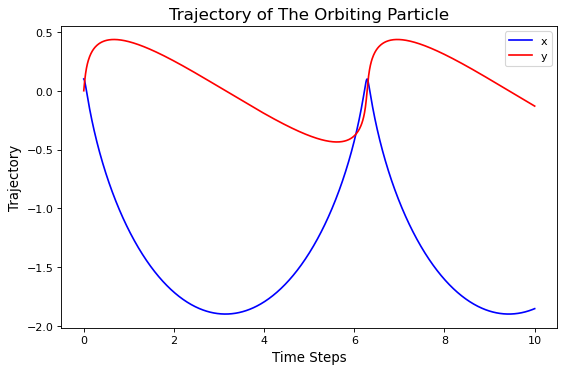

In [13]:
# Method 1
t = numpy.linspace(0.0, 10.0, 1000)
e = 0.9
# YOUR CODE HERE
#raise NotImplementedError()
x, y = solve_orbit_RK2(t, e)

figure = plt.figure(figsize = (8, 5), dpi = 80)
plt.plot(t, x, "b")
plt.plot(t, y, "r")
plt.xlabel("Time Steps", fontsize = 12)
plt.ylabel("Trajectory", fontsize = 12)
plt.legend(["x", "y"])
plt.title("Trajectory of The Orbiting Particle", fontsize = 15)
plt.show()

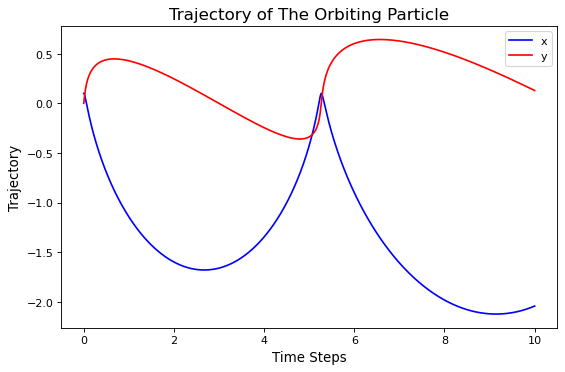

In [14]:
# Method 2
t = numpy.linspace(0.0, 10.0, 1000)
e = 0.9
# YOUR CODE HERE
#raise NotImplementedError()
x, y = solve_orbit_RK2_2(t, e)

figure = plt.figure(figsize = (8, 5), dpi = 80)
plt.plot(t, x, "b")
plt.plot(t, y, "r")
plt.xlabel("Time Steps", fontsize = 12)
plt.ylabel("Trajectory", fontsize = 12)
plt.legend(["x", "y"])
plt.title("Trajectory of The Orbiting Particle", fontsize = 15)
plt.show()

## Question 4 - Absolute Stability Regions and Order Stars

**(a)** (15) Plot the regions of absolute stability for the following:
1. Taylor Series methods of order 2 to 5,
1. 3-step and 4-step Adams-Basforth methods, and
1. 3-step and 4-step Adams-Moulton methods.

For the Taylor series methods also determine the interior and exterior of the stability regions.

**Let's use 3 cells to complete the question:**
- Cell 1: Taylor Series methods of order 2 to 5 plot
- Cell 2: Determine the interior and exterior of the stability regions of Taylor Method
- Cell 3: 3-step and 4-step Adams-Basforth methods plot
- Cell 4: 3-step and 4-step Adams-Moulton methods plot


<ipython-input-13-0573b17a22ab>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor_plot = axes.pcolor(X, Y, Ch, vmin=0, vmax=1, cmap=plt.get_cmap('Greens_r'))
<ipython-input-13-0573b17a22ab>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor_plot = axes.pcolor(X, Y, Ch, vmin=0, vmax=1, cmap=plt.get_cmap('Greens_r'))
<ipython-input-13-0573b17a22ab>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecat

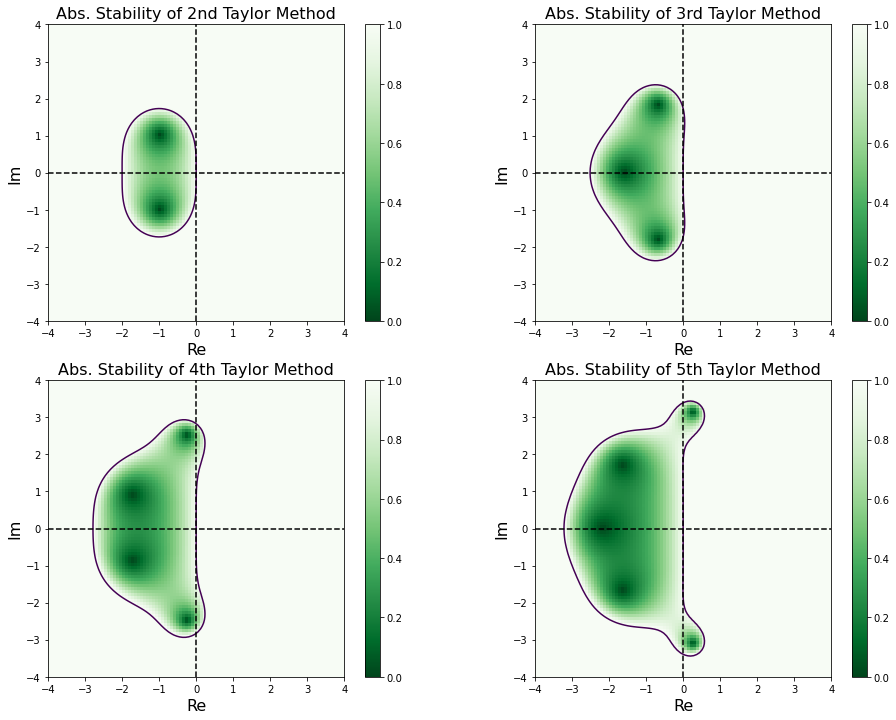

In [13]:
# Cell 1
# YOUR CODE HERE
#raise NotImplementedError()
def stability_plot(X, Y, C, axes, title=None, continuous=True):
    if  continuous:
        Ch = C
    else:
        Ch = numpy.heaviside(C-1,0.)
    pcolor_plot = axes.pcolor(X, Y, Ch, vmin=0, vmax=1, cmap=plt.get_cmap('Greens_r'))
    axes.contour(X, Y, C, 'k', levels=[1.0])
    fig = plt.gcf()
    fig.colorbar(pcolor_plot)
    axes.plot(x, numpy.zeros(x.shape),'k--')
    axes.plot(numpy.zeros(y.shape), y,'k--')
    
    axes.set_xlabel('Re', fontsize=16)
    axes.set_ylabel('Im', fontsize=16)
    if title is not None:
        axes.set_title(title, fontsize=16)
    
    axes.set_aspect('equal')

def plot_stability_ssms(R, x, y, axes=None, title=None):

    X,Y = numpy.meshgrid(x,y)
    Z = X + 1j * Y
    if axes is None:
        fig = plt.figure(figsize=(8,6))
        axes = fig.add_subplot(1,1,1)
    
    abs_R = numpy.abs(R(Z))
    stability_plot(X, Y, numpy.abs(R(Z)), axes, title)


x = numpy.linspace(-4, 4, 100)
y = numpy.linspace(-4, 4, 100)

R_Taylor2 = lambda z: 1 + z + z**2/2
R_Taylor3 = lambda z: 1 + z + z**2/2 + z**3/6
R_Taylor4 = lambda z: 1 + z + z**2/2 + z**3/6 + z**4/24.
R_Taylor5 = lambda z: 1 + z + z**2/2 + z**3/6 + z**4/24 + z**5/120

fig = plt.figure(figsize=(16, 12))
axes = fig.add_subplot(2,2,1)
plot_stability_ssms(R_Taylor2, x, y, axes=axes, title='Abs. Stability of 2nd Taylor Method')

axes = fig.add_subplot(2,2,2)
plot_stability_ssms(R_Taylor3, x, y, axes=axes, title='Abs. Stability of 3rd Taylor Method')

axes = fig.add_subplot(2,2,3)
plot_stability_ssms(R_Taylor4, x, y, axes=axes, title='Abs. Stability of 4th Taylor Method')

axes = fig.add_subplot(2,2,4)
plot_stability_ssms(R_Taylor5, x, y, axes=axes, title='Abs. Stability of 5th Taylor Method')

    
#interior and exterior of the stability regions.

In [14]:
# Cell 2

#2nd
print("Taylor series method of order 2 - Stability region tests")
z = -1 + 1j * 0
print("  Inside of strange region: ", numpy.abs(1 + z + 0.5 * z**2))
z = -4 + 1j * 0
print("  Outside of strange region: ", numpy.abs(1 + z + 0.5 * z**2))

#3rd
print("Taylor series method of order 3 - Stability region tests")
z = -1 + 1j * 0
print("  Inside of strange region: ", numpy.abs(1 + z + 0.5 * z**2 + 1.0/6.0 * z**3))
z = -4 + 1j * 0
print("  Outside of strange region: ", numpy.abs(1 + z + 0.5 * z**2 + 1.0/6.0 * z**3))

#4th
print("Taylor series method of order 4 - Stability region tests")
z = -1 + 1j * 0
print("  Inside of strange region: ", numpy.abs(1 + z + 0.5 * z**2 + 1.0/6.0 * z**3 + 1.0 / 24.0 * z**4))
z = -4 + 1j * 0
print("  Outside of strange region: ", numpy.abs(1 + z + 0.5 * z**2 + 1.0/6.0 * z**3 + 1.0 / 24.0 * z**4))

#5th
print("Taylor series method of order 5 - Stability region tests")
z = -1 + 1j * 0
print("  Inside of strange region: ", numpy.abs(1 + z + 0.5 * z**2 + 1.0/6.0 * z**3 + 1.0 / 24.0 * z**4 + z**5/120))
z = -4 + 1j * 0
print("  Outside of strange region: ", numpy.abs(1 + z + 0.5 * z**2 + 1.0/6.0 * z**3 + 1.0 / 24.0 * z**4 + z**5/120))

Taylor series method of order 2 - Stability region tests
  Inside of strange region:  0.5
  Outside of strange region:  5.0
Taylor series method of order 3 - Stability region tests
  Inside of strange region:  0.33333333333333337
  Outside of strange region:  5.666666666666666
Taylor series method of order 4 - Stability region tests
  Inside of strange region:  0.37500000000000006
  Outside of strange region:  5.0
Taylor series method of order 5 - Stability region tests
  Inside of strange region:  0.3666666666666667
  Outside of strange region:  3.533333333333333


- 3 Step AB:
$$\begin{aligned}
U_{n+3} &=U_{n+2}+\frac{\Delta t}{12}\left(23 f\left(U_{n+2}\right)-16 f\left(U_{n+1}\right)+5 f\left(U_{n}\right)\right) \\
U_{n+3} &=U_{n+2}+\frac{1}{12}\left(23 z U_{n+2}-16 z U_{n+1}+5 z U_{n}\right) \\
\xi^{3} &=\xi^{2}+\frac{1}{12}\left(23 z \xi^{2}-16 z \xi+5 z\right) \\
\xi^{3} &-\xi^{2}\left(1+\frac{23 z}{12}\right)+\frac{16 z}{12} \xi-\frac{5 z}{12}=0
\end{aligned}
$$

- 4 Step AB:
$$\begin{array}{l}
U_{n+4}=U_{n+3}+\frac{\Delta t}{24}\left(-9 f\left(U_{n}\right)+37 f\left(U_{n+1}\right)-59 f\left(U_{n+2}\right)+55 f\left(U_{n+3}\right)\right) \\
\xi^{4}-\xi^{3}-\frac{1}{24}\left(-9 z+37 z \xi-59 z \xi^{2}+55 z \xi^{3}\right)=0 \\
24 \xi^{4}+\xi^{3}(-24-55 z)+59 z \xi^{2}-37 z \xi+9 z=0
\end{array}
$$

- 3 Step AM:
$$\begin{array}{c}
U_{n+3}=U_{n+2}+\frac{\Delta t}{24}\left(f\left(U_{n}\right)-5 f\left(U_{n+1}\right)+19 f\left(U_{n+2}\right)+9 f\left(U_{n+3}\right)\right. \\
U_{n+3}=U_{n+2}+\frac{1}{24}\left(z U_{n}-5 z U_{n+1}+19 z U_{n+2}+9 z U_{n+3}\right) \\
24 U_{n+3}-24 U_{n+2}-z U_{n}+5 z U_{n+1}-19 z U_{n+2}-9 z U_{n+3}=0 \\
\xi^{3}(29-9 z)+\xi^{2}(-19 z-24)+5 z \xi-z=0
\end{array}
$$

- 4 Step AM:
$$\begin{array}{c}
U_{n+4}=U_{n+3}+\frac{\Delta t}{720}\left(-19 f\left(U_{n}\right)+106 f\left(U_{n+1}\right)-264 f\left(U_{n+2}\right)+646 f\left(U_{n+3}\right)+251 f\left(U_{n+4}\right)\right) \\
U_{n+4}=U_{n+3}+\frac{1}{720}\left(-19 z U_{n}+106 z U_{n+1}-264 z U_{n+2}+646 z U_{n+3}+251 z U_{n+4}\right) \\
720 \xi^{4}-720 \xi^{3}+19 z-106 z \xi+264 z \xi^{2}-646 z \xi^{3}-251 z \xi^{4}=0 \\
\xi^{4}(720-251 z)+\xi^{3}(-720-646 z)+264 z \xi^{2}-106 z \xi+19 z=0
\end{array}
$$

<ipython-input-13-0573b17a22ab>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor_plot = axes.pcolor(X, Y, Ch, vmin=0, vmax=1, cmap=plt.get_cmap('Greens_r'))
<ipython-input-13-0573b17a22ab>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor_plot = axes.pcolor(X, Y, Ch, vmin=0, vmax=1, cmap=plt.get_cmap('Greens_r'))


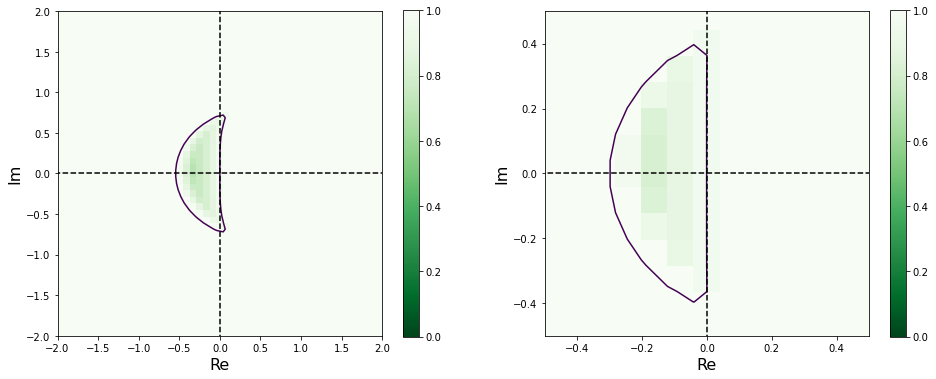

In [15]:
# Cell 3 - AB
def plot_stability_lmm(pi_coeff, x, y, axes=None, title=None):
       
    X,Y = numpy.meshgrid(x,y)
    Z = X + 1j * Y
    if axes is None:
        fig = plt.figure(figsize=(8,6))
        axes = fig.add_subplot(1,1,1)
    
    norm_max = numpy.empty(Z.shape)
    for i,row in enumerate(Z):
        for j, z in enumerate(row):
            norm_max[i,j] = max(numpy.abs(numpy.roots(pi_coeff(z))))
    
    stability_plot(X, Y, norm_max, axes, title)


AB_3 = lambda z: numpy.array([1,-(1+23*z/12), 16*z/12, -5*z/12])
AB_4 = lambda z: numpy.array([24, -24-55*z, 59*z, -37*z, 9*z])

fig = plt.figure(figsize=(16, 6))
axes = fig.add_subplot(1,2,1)
axes.set_xlim([-2,2])
axes.set_ylim([-2,2])
plot_stability_lmm(AB_3, x, y, axes=axes, title=None)

axes = fig.add_subplot(1,2,2)
axes.set_xlim([-.5,.5])
axes.set_ylim([-.5,.5])
plot_stability_lmm(AB_4, x, y, axes=axes, title=None)

<ipython-input-13-0573b17a22ab>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor_plot = axes.pcolor(X, Y, Ch, vmin=0, vmax=1, cmap=plt.get_cmap('Greens_r'))
<ipython-input-13-0573b17a22ab>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor_plot = axes.pcolor(X, Y, Ch, vmin=0, vmax=1, cmap=plt.get_cmap('Greens_r'))


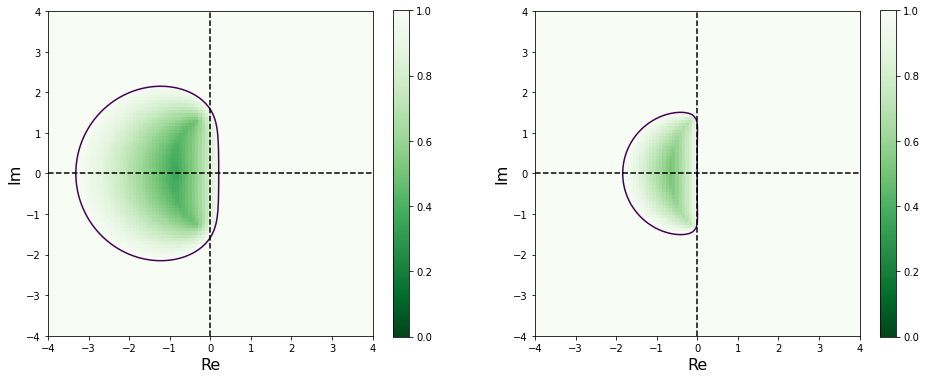

In [16]:
# Cell 4 - AM
AM_3 = lambda z: numpy.array([29-9*z, -19*z-24, 5*z, -z])
AM_4 = lambda z: numpy.array([720-251*z, -720-646*z, 264*z, -106*z, 19*z])

fig = plt.figure(figsize=(16, 6))
axes = fig.add_subplot(1,2,1)
axes.set_xlim([-4,4])
axes.set_ylim([-4,4])
plot_stability_lmm(AM_3, x, y, axes=axes, title=None)

axes = fig.add_subplot(1,2,2)
axes.set_xlim([-4,4])
axes.set_ylim([-4,4])
plot_stability_lmm(AM_4, x, y, axes=axes, title=None)

**(b)** (15) The region of absolute stability as defined ensures that the error does not grow in subsequent time-steps hence why we require $|R(z)| < 1$.  In reality what we really want is that the errors decay faster than the solution or that it grows slower than the true solution.  Consider the solution of an ODE $u(t) = e^{\lambda t}$, if $\lambda < 0$ then we want our errors made at each time step $E^n$ to decay faster than $e^{\lambda t}$ so that $|E^n| < e^{\lambda t}$.  Conversely if $\lambda > 0$ then we might also want $|E^n| < e^{\lambda t}$.  This suggests a new definition of stability, called the **relative stability** defined as

$$|R(z)| \leq |e^z|.$$

These turn out to be difficult to plot but proved pivotal due to work in 1978 by Wanner, Hairer and Nørset.  More recently a new set of regions, called **order stars**, have become more popular to consider.  These are defined as the three regions

$$\begin{aligned}
    \mathcal{A}_{-} &= \{ z \in \mathbb{C}: |R(z)| < |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| < 1\}, \\ 
    \mathcal{A}_{0} &= \{ z \in \mathbb{C}: |R(z)| = |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| = 1\}, ~~~~\text{and} \\
    \mathcal{A}_{+} &= \{ z \in \mathbb{C}: |R(z)| > |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| > 1\}.
\end{aligned}$$

Plot the region $\mathcal{A}_{0}$ for the Taylor series methods asked for in part (a).  Do you see any relation to the number of "fingers" and the order of the method?

<ipython-input-13-0573b17a22ab>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor_plot = axes.pcolor(X, Y, Ch, vmin=0, vmax=1, cmap=plt.get_cmap('Greens_r'))
<ipython-input-13-0573b17a22ab>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor_plot = axes.pcolor(X, Y, Ch, vmin=0, vmax=1, cmap=plt.get_cmap('Greens_r'))
<ipython-input-13-0573b17a22ab>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecat

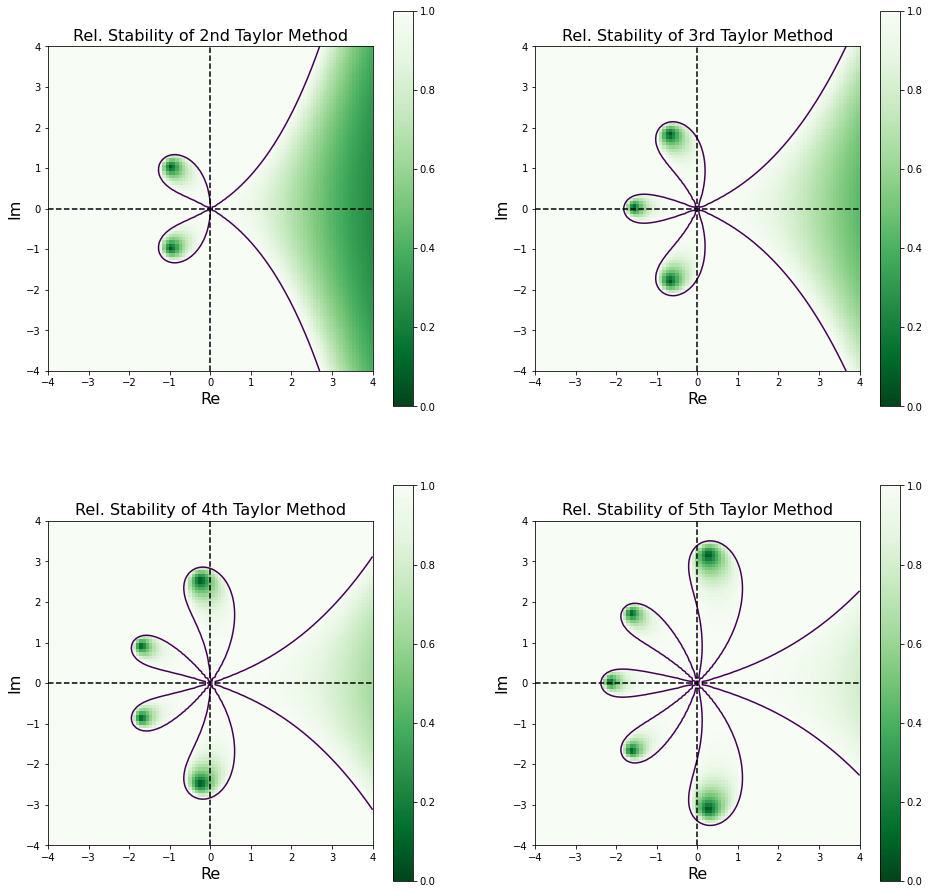

In [17]:
# YOUR CODE HERE
#raise NotImplementedError()
# Given question a, we only need to time e^(-z)

x = numpy.linspace(-4, 4, 100)
y = numpy.linspace(-4, 4, 100)

S2 = lambda z: numpy.exp(-z)*(1 + z + z**2/2)
S3 = lambda z: numpy.exp(-z)*(1 + z + z**2/2 + z**3/6.)
S4 = lambda z: numpy.exp(-z)*(1 + z + z**2/2 + z**3/6. + z**4/24)
S5 = lambda z: numpy.exp(-z)*(1 + z + z**2/2 + z**3/6. + z**4/24 + z**5/120)

fig = plt.figure(figsize=(16,16))

axes = fig.add_subplot(2,2,1)
plot_stability_ssms(S2, x, y, axes=axes, title='Rel. Stability of 2nd Taylor Method')

axes = fig.add_subplot(2,2,2)
plot_stability_ssms(S3, x, y, axes=axes, title='Rel. Stability of 3rd Taylor Method')

axes = fig.add_subplot(2,2,3)
plot_stability_ssms(S4, x, y, axes=axes, title='Rel. Stability of 4th Taylor Method')

axes = fig.add_subplot(2,2,4)
plot_stability_ssms(S5, x, y, axes=axes, title='Rel. Stability of 5th Taylor Method')

Comment:
   The number of fingers = The order of the method

## Question 5 - SciPy Integrate

Consider the decay process
$$
    A \overset{K_1}{\rightarrow} B \overset{K_2}{\rightarrow} C \overset{K_3}{\rightarrow} D
$$
represented by the system of ODEs
\begin{align*}
    \frac{\text{d}A}{\text{d}t} &= -K_1 A \\
    \frac{\text{d}B}{\text{d}t} &= K_1 A - K_2 B \\
    \frac{\text{d}C}{\text{d}t} &= K_2 B - K_3 C \\
    \frac{\text{d}D}{\text{d}t} &= K_3 C \\
\end{align*}

**(a)** (10) Write a function that uses `scipy.integrate` to compute the solution to the system of ODEs given an initial condition and time points to output at.  This function should take in the time points for the output, an initial condition, the ODE integrator to use (default to "dopri5"), and the reaction rates $K_1$, $K_2$, and $K_3$.

In [1]:
import scipy.integrate as integrate
def solve_decay_system(t, u_0, solver_type="dopri5", K_1=0.0, K_2=0.0, K_3=0.0):
    # YOUR CODE HERE
    # raise NotImplementedError()
    
    N = len(t)
    U = numpy.empty((4, N))
    U[:, 0] = u_0    
    
    A = numpy.array([-K_1, 0, 0, 0, K_1, -K_2, 0, 0, 0, K_2, -K_3, 0, 0, 0, K_3, 0])
    A = A.reshape(4, 4)
    def f(t, U):
        return numpy.dot(A, U)

    integrator = integrate.ode(f)
    integrator.set_integrator("dopri5")
    integrator.set_initial_value(U[:, 0])
    
    for (n, t_n) in enumerate(t[1:]):
        integrator.integrate(t_n)
        if not integrator.successful():
            break
        U[:, n + 1] = integrator.y
    U = numpy.transpose(U)
    return U

In [19]:
t = numpy.linspace(0.0, 10.0, 10)
u_0 = numpy.array([1.0, 0.0, 0.0, 0.0])
U = solve_decay_system(t, u_0, solver_type='dopri5', K_1=1.0, K_2=2.0, K_3=3.0)
U_sol = numpy.array([[1.0000000000000000e+00, 0.0000000000000000e+00,
                      0.0000000000000000e+00, 0.0000000000000000e+00],
                     [3.2919298826277271e-01, 2.2082495381343401e-01,
                      1.4813096181267352e-01, 3.0185109611111993e-01],
                     [1.0836802654276900e-01, 9.6624368667878130e-02,
                      8.6153390524786266e-02, 7.0885421426456674e-01],
                     [3.5673996630001523e-02, 3.4401353001617396e-02,
                      3.3174114479337484e-02, 8.9675053588904374e-01],
                     [1.1743631968628626e-02, 1.1605715517361529e-02,
                      1.1469419325266718e-02, 9.6518123318874338e-01],
                     [3.8659219913406520e-03, 3.8509760174843801e-03,
                      3.8360878593115726e-03, 9.8844701413186375e-01],
                     [1.2726346009991362e-03, 1.2710149139283067e-03,
                      1.2693972897971615e-03, 9.9618695319527573e-01],
                     [4.1894244902209761e-04, 4.1876692442412833e-04,
                      4.1859147343448249e-04, 9.9874369915311978e-01],
                     [1.3791293652887476e-04, 1.3789391503107924e-04,
                      1.3787489615970831e-04, 9.9958631825228084e-01],
                     [4.5399978275093905e-05, 4.5397916926305302e-05,
                      4.5395855671230534e-05, 9.9986380624912774e-01]])
numpy.testing.assert_allclose(U, U_sol)
print("Success!")

Success!
